In [ ]:
# import all liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
# Read CSV File
df = pd.read_csv('bank.csv')

In [ ]:
df = df.copy() #backup

In [ ]:
# Print top 5 rows
df.head()

In [ ]:
#Find how many rows and column in dataset
df.shape

In [ ]:
# summaries all Data
df.info()

In [ ]:
# describe Dataset
df.describe(include='all')

In [ ]:
# Describe only Object Column
df.describe(include='object')

In [ ]:
# Describe by default numeric columns
df.describe()

In [ ]:
# convert columns name to Title Case
df.columns = df.columns.str.capitalize()

In [ ]:
# check columns
df.columns

In [ ]:
# Rename Columns
df.rename(columns={'Marital':'Marital Status', 'Pdays' : 'Days_Since_Last_Contact ',
                    'Poutcome':'Previous_Outcome',
                    'Y': 'Customer_Subscription'},inplace=True)

In [ ]:
df.dtypes

In [ ]:
# Change the Data Types
df['Job'] = df['Job'].astype('category')
df['Marital Status'] = df['Marital Status'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Default'] = df['Default'].astype('category')
df['Housing'] = df['Housing'].astype('category')
df['Loan'] = df['Loan'].astype('category')
df['Contact'] = df['Contact'].astype('category')
df['Month'] = df['Month'].astype('category')
df['Previous_Outcome'] = df['Previous_Outcome'].astype('category')
df['Customer_Subscription'] = df['Customer_Subscription'].astype('category')

In [ ]:
# Check Verify
df.dtypes

In [ ]:
# Find the Unique Values in All Columns
df.nunique()

In [ ]:
# Find Duplicates
df.duplicated().sum()

In [ ]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

In [ ]:
# Find Count of Job values in Percentage
df['Job'].value_counts(normalize=True,ascending=True)

In [ ]:
# Find Null Values in Percentage form
df.isna().mean()*100

In [ ]:
# Find Null Values
df.isna().sum()

In [ ]:
# Find Total Null Values
df.isna().sum().sum()

In [ ]:
df['Balance'].mode()

In [ ]:
# Fill Null Values in Balance Columns
df['Balance'] = df['Balance'].fillna(df['Balance'].mean())

In [ ]:
df['Balance'].isna().sum()

In [ ]:
df['Campaign'].mode()

In [ ]:
df['Campaign'].unique()

In [ ]:
#Using [0] extracts the first (and typically only) mode value to fill the missing values.
df['Campaign'] = df['Campaign'].fillna(df['Campaign'].mode()[0])

In [ ]:
df.Campaign.isna().sum()

In [ ]:
df.info()

# Data Visualization

 1. How many married individuals are unemployed?
 
 2. What is the average age of individuals who subscribed to a term deposit versus those who did not?
 
 3. How does the average balance vary across different contact months?
 
 4. How does the average duration of customer calls vary by month?
 
 5. What is the distribution of marital status (married/single/divorced) across different education levels?

# 1. How many married individuals are unemployed?

In [ ]:
# Filter the dataset for married individuals who are unemployed
married_unemployed = df[(df['Marital Status'] == 'married') & (df['Job'] == 'unknown')]

In [ ]:
# Count the number of married unemployed individuals
count_married_unemployed = married_unemployed.shape[0]
count_married_unemployed

In [ ]:
# Visualization: Pie chart
size = [count_married_unemployed, df.shape[0] - count_married_unemployed]
plt.pie(size,labels=['married_unemployed','others'],autopct="%.2f%%",explode=(0.1,0),startangle=90,colors=['#ff6666', '#66b3ff'],shadow=True, wedgeprops={'edgecolor': 'black'})
plt.title('Proportion of Married Unemployed Individuals', fontsize=16, fontweight='bold')
plt.savefig(r"D:\Data Analysis with Python\Python Projects\UCI_Bank_Data_Analysis\chart.png",dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

 Report 
 
 The analysis identifies the number of married unemployed individuals in the dataset by filtering for married individuals with an 'unknown' job status. The result is visualized using a pie chart to show the proportion of married unemployed individuals compared to the rest. The chart highlights that a small subset of the population falls into this category. This provides insights into the distribution of employment status among married individuals. The visualization aids in understanding the relationship between marital status and employment.


# 2. What is the average age of individuals who subscribed to a term deposit versus those who did not?

In [ ]:
avg_age_subscribed = df[df['Customer_Subscription'] == 'yes']['Age'].mean()
avg_age_not_subscribed = df[df['Customer_Subscription'] == 'no']['Age'].mean()

In [ ]:
labels = ['Subscribed','Not Subscribed']
avg_ages = [avg_age_subscribed,avg_age_not_subscribed]
plt.pie(avg_ages,labels=labels,autopct='%1.1f%%',startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Average Age of Individuals Who Subscribed vs. Did Not Subscribe to a Term Deposit', fontsize=10, fontweight='bold')
plt.savefig(r"D:\Data Analysis with Python\Python Projects\UCI_Bank_Data_Analysis\chart1.png")
plt.show()

Report

The analysis compares the average age of individuals who subscribed and those who did not to a term deposit using a pie chart. The chart highlights the demographic differences between the two groups. It shows that individuals who subscribed have a distinct average age compared to those who did not. This information can help refine marketing strategies targeted at specific age groups. The visualization provides a clear view of the age distribution in relation to term deposit subscriptions..


# 3. How does the average balance vary across different contact months?

In [ ]:
# Group by 'Month' and calculate the average balance for each month
avg_balance_per_month = df.groupby('Month')['Balance'].mean()

In [ ]:
plt.figure(figsize=(10,6))
avg_balance_per_month.plot(kind='barh',color=['#66b3ff', '#ff9999', '#66b3ff', '#ff9999', '#66b3ff', '#ff9999', '#66b3ff', '#ff9999', '#66b3ff', '#ff9999', '#66b3ff', '#ff9999'])
plt.xlabel('Average Balance',fontsize=12)
plt.ylabel('Month',fontsize=12)
plt.title('Average Balance Across Different Contact Months', fontsize=16, fontweight='bold')
plt.show()

Report

The analysis shows how the average balance varies across different contact months using a horizontal bar chart. The chart reveals fluctuations in average balance throughout the months, with some months having higher average balances than others. These variations might be linked to seasonal factors or marketing campaigns. The visualization provides insights into customer behavior and financial patterns, which could inform targeted marketing strategies. It also highlights months with significant changes in customer balances.

# 4. How does the average duration of customer calls vary by month?

In [ ]:
# Group by 'Month' and calculate the average duration of customer calls for each month
avg_duration_per_month = df.groupby('Month')['Duration'].mean()

In [ ]:
avg_duration_per_month.plot(kind='barh',color=['#66b3ff', '#ff9999', '#66b3ff', '#ff9999', '#66b3ff', '#ff9999', '#66b3ff', '#ff9999', '#66b3ff', '#ff9999', '#66b3ff', '#ff9999'])
plt.title('Average Balance Across Different Contact Months',fontweight='bold',fontsize=16)
plt.xlabel('Duration',fontsize=12)
plt.ylabel("Month",fontsize=12)
plt.grid(True,alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Report

The analysis shows how the average duration of customer calls varies across different months. The line chart indicates fluctuations in call duration over the year. Some months show longer call durations, while others have shorter averages. This trend could reflect seasonal marketing efforts or customer engagement patterns. The visualization helps understand how call durations change over time, which can be useful for evaluating the effectiveness of campaigns or customer service performance.


5. What is the distribution of marital status (married/single/divorced) across different education levels?

In [ ]:
# Group by 'Education' and 'Marital_Status' to get the count of each marital status for each education level
education_marital_counts = df.groupby(['Education', 'Marital Status']).size()
education_marital_counts


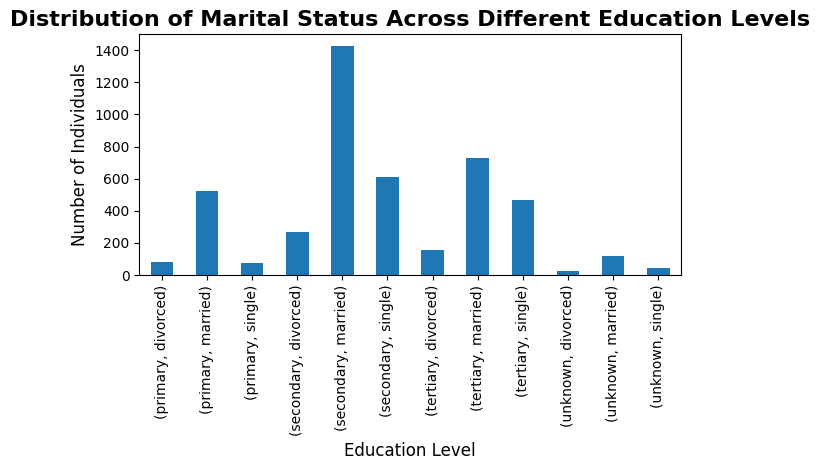

In [60]:
education_marital_counts.plot(kind='bar')

plt.title('Distribution of Marital Status Across Different Education Levels', fontsize=16, fontweight='bold')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Report: 
The analysis visualizes the distribution of marital status across education levels. Higher education levels show a more balanced marital status, while lower levels have more single individuals. This highlights how marital status varies with education. The chart offers valuable insights for demographic analysis and marketing strategies.
